# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import seaborn as sns
import scipy


In [2]:
path = r'/Users/bazillaimran/Documents/02-2023 Instacart Basket Analysis'

In [3]:
df_all = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_customers_merged.pkl'))

# 2. Create a bar chart, a histogram, a scatterplot, and a line chart (using sample subset)

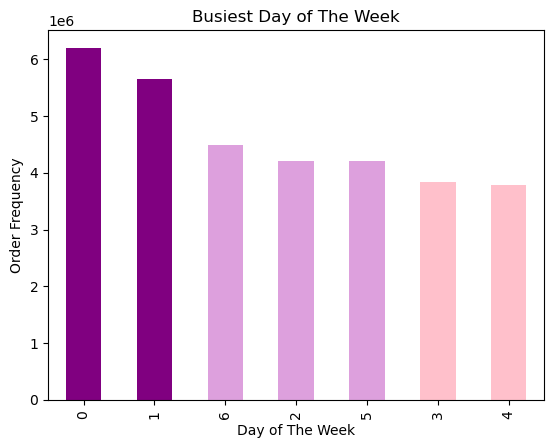

In [4]:
# df_all['orders_day_of_week'] is a categorical variable
bar = df_all['orders_day_of_week'].value_counts().plot.bar(title='Busiest Day of The Week', xlabel='Day of The Week', ylabel='Order Frequency', color=['purple', 'purple', 'plum', 'plum', 'plum', 'pink', 'pink'])

# Export it outside of Jupyter in the form of an image file
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# Display the plot
plt.show()

In [5]:
df_all['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [6]:
# Calculate statistics
mean_price = 7.80
std_price = 4.24

# Define price range thresholds
lower_bound = mean_price - std_price
upper_bound = mean_price + std_price

# Categorize prices into three ranges
df_all['price_range'] = pd.cut(df_all['prices'], bins=[-float('inf'), lower_bound, upper_bound, float('inf')],
                           labels=['Low', 'Medium', 'High'], include_lowest=True)

# Display the updated DataFrame
print(df_all)

          product_id                product_name  aisle_id  department_id  \
0                  1  Chocolate Sandwich Cookies        61             19   
1                  1  Chocolate Sandwich Cookies        61             19   
2                907        Premium Sliced Bacon       106             12   
3                907        Premium Sliced Bacon       106             12   
4               1000                    Apricots        18             10   
...              ...                         ...       ...            ...   
32404854       49235         Organic Half & Half        53             16   
32404855       49520      Orange Sparkling Water       115              7   
32404856       49520      Orange Sparkling Water       115              7   
32404857       49520      Orange Sparkling Water       115              7   
32404858       49520      Orange Sparkling Water       115              7   

          prices  order_id  user_id  order_number  orders_day_of_week  \
0 

In [7]:
df_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,Last Name,Gender,State,Age,date_joined,dependants,family_status,income,_merge,price_range
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Medium
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Medium
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,High
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,High
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,High


(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Low')])

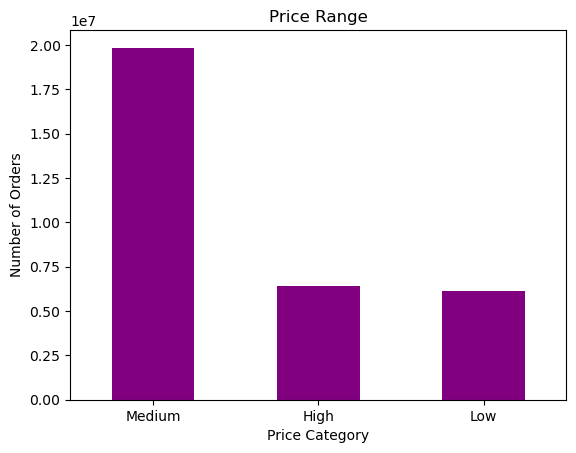

In [8]:
bar_price_range = df_all['price_range'].value_counts(dropna = True).plot.bar(title = 'Price Range', xlabel = 'Price Category', ylabel = 'Number of Orders', color = 'purple')
plt.xticks(rotation=0)

In [9]:
#saving as png
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))

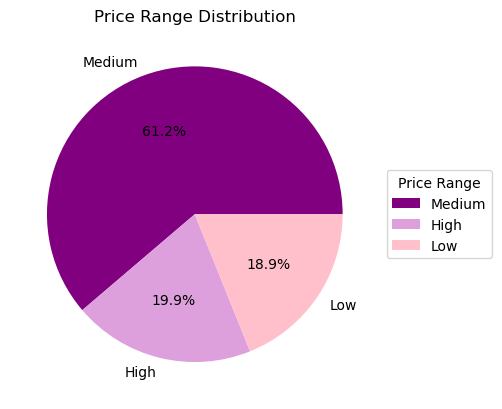

In [10]:
price_range_counts = df_all['price_range'].value_counts(dropna=True)

# Plotting pie chart
plt.pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%', colors=['purple', 'plum', 'pink'])

# Adding title
plt.title('Price Range Distribution')

# Creating legend
plt.legend(price_range_counts.index, title="Price Range", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Save the figure as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_price_range.png'))

# Display the pie chart
plt.show()


<Axes: ylabel='Frequency'>

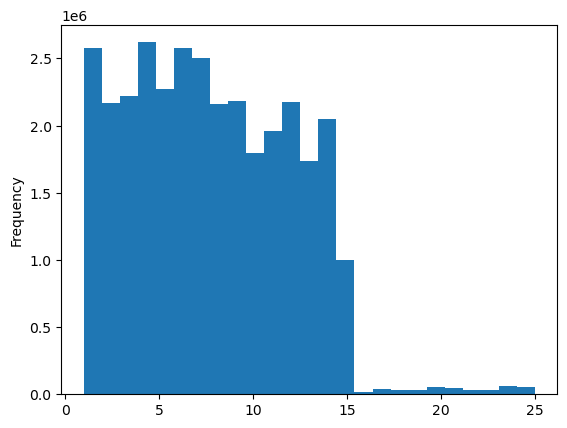

In [11]:
# Create Histograms and Scatterplots
df_all['prices'].plot.hist(bins = 25)

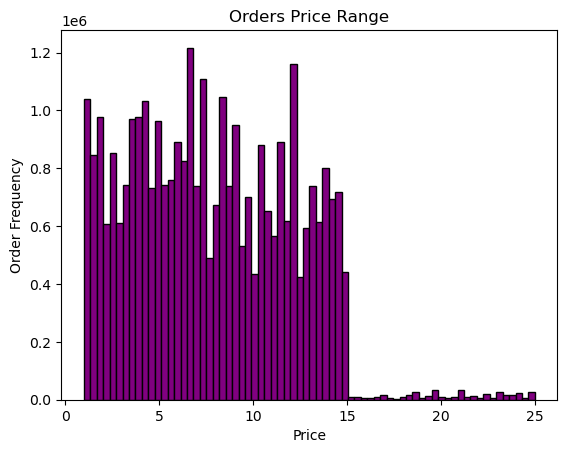

In [12]:
# increase level of granularity in the histogram - bin 70
hist_2 = df_all['prices'].plot.hist(bins = 70, title = 'Orders Price Range', xlabel = 'Price', ylabel = 'Order Frequency', color = 'purple', edgecolor = 'black')

In [13]:
# export hist_2 outside of juypter in the form of an image file
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

In [14]:
## Creating line Charts
# Sampling (randomized) Data
# 1. Create a list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_all)) <=0.7

In [15]:
# Store 70% of the sample in the dataframe big
big = df_all[dev]

In [16]:
# Store 30% of the sample in the dataframe small
small = df_all[~dev]

In [17]:
# Check if big and small adds up to the df_all length (number of rows)
len(df_all)

32404859

In [18]:
len(big)+len(small)

32404859

In [19]:
df_2 = small[['orders_day_of_week','prices']]

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Price')

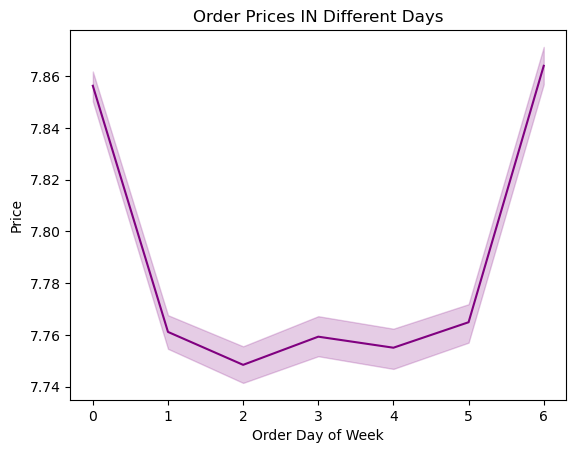

In [20]:
line_odw = sns.lineplot(data = df_2,x = 'orders_day_of_week', y = 'prices', color = 'purple')
plt.title('Order Prices IN Different Days')
plt.xlabel('Order Day of Week')
plt.ylabel('Price')

In [21]:
# export as an image file
line_odw.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_odw.png'))

# 3. Create a histogram of order_hour_of_day column

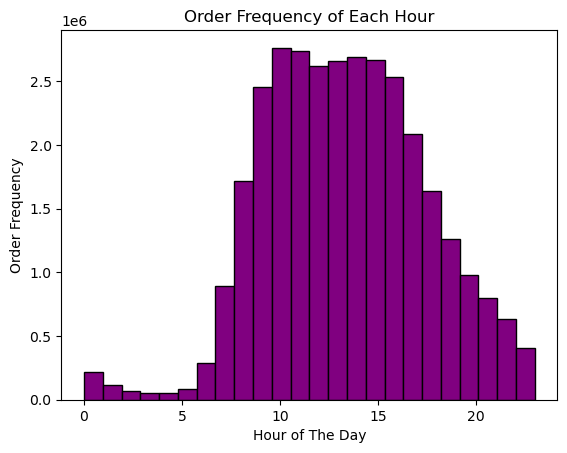

In [22]:
# Create Histograms and Scatterplots
hist_tod = df_all['order_hour_of_day'].plot.hist(bins = 24, title = 'Order Frequency of Each Hour', xlabel = 'Hour of The Day', ylabel = 'Order Frequency' , color='purple', edgecolor ='black')

Based on the histogram, it appears that the busiest hours of the day for purchases are around 10 am in the morning. The majority of transactions tend to occur between 9 am and 4 pm, indicating peak shopping activity during these hours. On the other hand, the least frequent purchases are observed in the early morning hours, specifically between 12 am and 5 am. This suggests a lull in transactional activity during the late night and early morning periods

In [23]:
# export as an image file
hist_tod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_tod.png'))

# 4. Create a bar chart from the "loyalty_flag" column

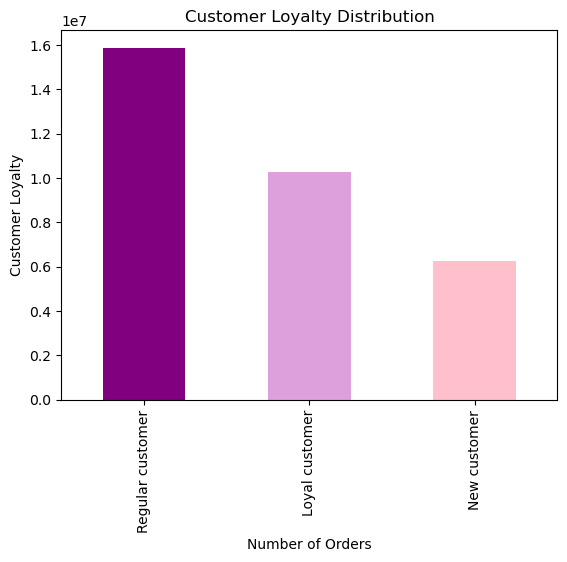

In [24]:
# Calculate loyalty flag counts
loyalty_counts = df_all['loyalty_flag'].value_counts()

# Plotting bar chart
bar_loyalty = loyalty_counts.plot.bar(xlabel='Number of Orders', ylabel='Customer Loyalty', color=['purple', 'plum', 'pink'])

# Adding title
plt.title('Customer Loyalty Distribution')

# Save the figure as an image
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))

# Display the bar chart
plt.show()

# 5. Create a line graph to check the difference in expenditure depending on the hour of the day

In [25]:
df_expenditure = small[['order_hour_of_day','prices']]

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Price')

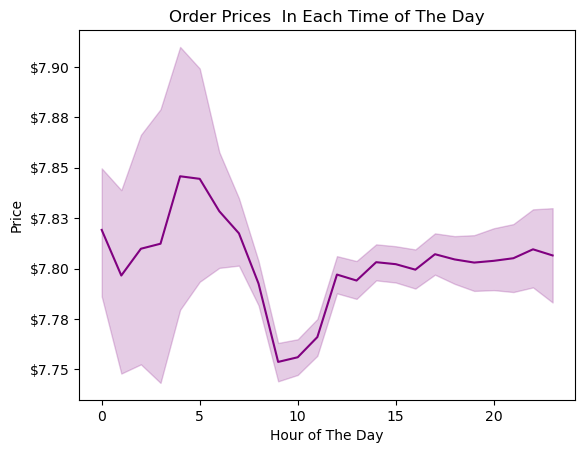

In [26]:
line_expenditure = sns.lineplot(data = df_expenditure, x = 'order_hour_of_day', y = 'prices', color = 'purple')
line_expenditure.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x:.2f}'))
plt.title('Order Prices  In Each Time of The Day')
plt.xlabel('Hour of The Day')
plt.ylabel('Price')

Expenditure tends to be lower during peak busy hours, with the majority of spending concentrated in the early morning, specifically around 4 to 5 am.

In [27]:
# export as an image file
line_expenditure.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_expenditure.png'))

# 6. Exploratory Analysis of customer demgraphics - Create a line chart exploring the connections between age and dependents

In [28]:
df_demographics = small[['Age','dependants']]

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


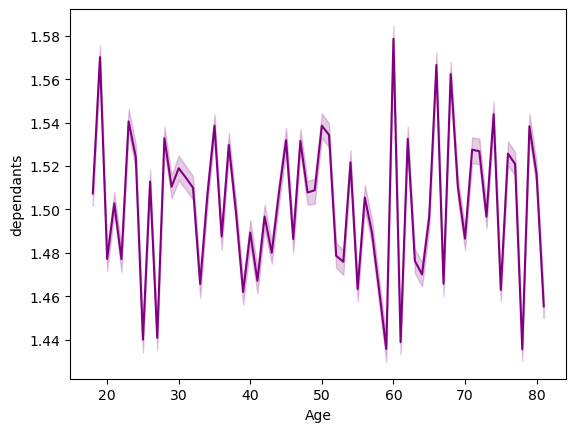

In [29]:
line_demographics = sns.lineplot(data = df_demographics, x = 'Age', y = 'dependants', color = 'purple')

The line graph displays notable peaks in the number of dependents for individuals around 60 years of age and those in theirb late teens. However, the overall trend appears to be scattered, making it challenging to definitively conclude a strong correlation between age and the number of dependents. 

In [30]:
# group the values into categorical Age Brackets
df_demographics['Age_Bracket'] = pd.cut(df_demographics['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

/var/folders/17/9z1yp8ss3r174mlj49ql3qgr0000gn/T/ipykernel_98121/1692962681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demographics['Age_Bracket'] = pd.cut(df_demographics['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])


/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


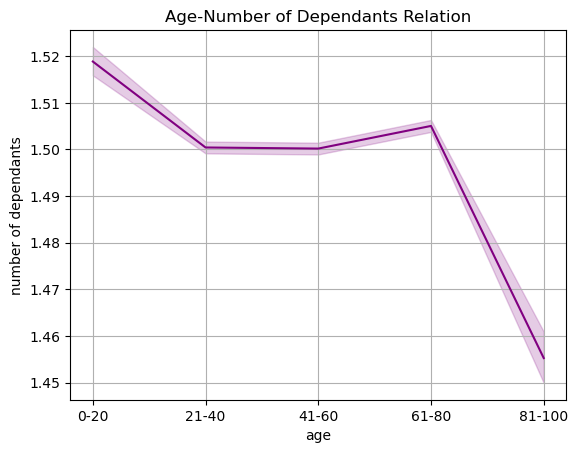

In [31]:
line_demographics_2 = sns.lineplot(data=df_demographics, x='Age_Bracket', y='dependants', color='purple')
line_demographics_2.set(xlabel='age', ylabel='number of dependants')
plt.title('Age-Number of Dependants Relation')
plt.grid()

In [32]:
# export as an image file
line_demographics_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_demographics.png'))

# 7. Analysis conncection between age and income by creating a Scatterplot

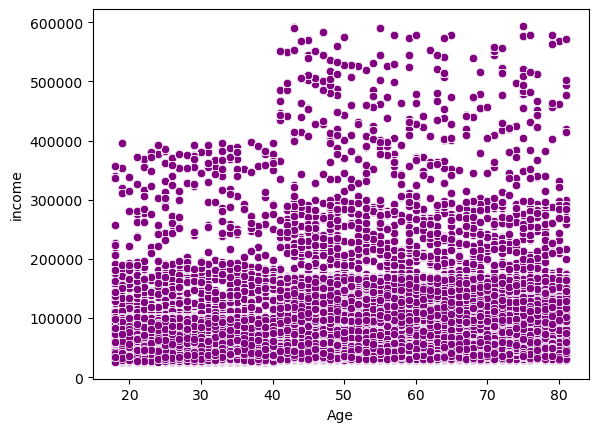

In [33]:
plot_age_income = sns.scatterplot(x = 'Age', y = 'income', data = small, color = 'purple')

The scatterplot shows that the majority of incomes for all ages are below 200k. However, for age 40 and below, the max incomes are below 400k. For age above 40, there is a large concentration of income between 200k and 300k and there are some incomes that reach as high as 600k. 

In [34]:
# group the values into categorical Age Brackets
small['Age_Bracket'] = pd.cut(small['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

/var/folders/17/9z1yp8ss3r174mlj49ql3qgr0000gn/T/ipykernel_98121/771792558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['Age_Bracket'] = pd.cut(small['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])


[Text(0.5, 0, 'age'), Text(0, 0.5, 'income')]

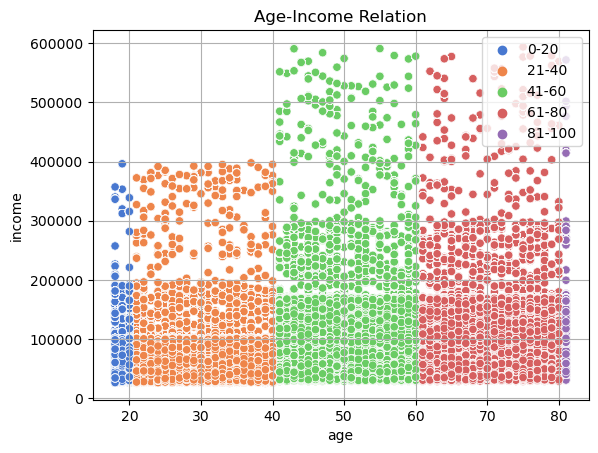

In [35]:
plot_age_income_2 = sns.scatterplot(x='Age', y='income', data=small, hue='Age_Bracket', palette='muted')
plot_age_income_2.legend(loc='upper right')
plt.grid()
plt.title('Age-Income Relation')
plot_age_income_2.set(xlabel='age', ylabel='income')

In [36]:
# export plot_age_income as an image file
plot_age_income_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'plot_age_income.png'))

In [37]:
# exporting small randomized sampling data
small.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'small_sample.pkl'))